In [1]:
### setting source planet

In [9]:
from skyfield.api import load, Topos
planets = load('de421.bsp')
earth = planets['earth']

In [3]:
### getting all star data

In [4]:
from skyfield.data import hipparcos

with load.open(hipparcos.URL) as f:
    stars = hipparcos.load_dataframe(f)

In [5]:
stars.head()

,magnitude,ra_degrees,dec_degrees,parallax_mas,ra_mas_per_year,dec_mas_per_year,ra_hours,epoch_year
hip,,,,,,,,
1,9.10,0.000912,1.089013,3.54,-5.20,-1.88,0.000061,1991.25
2,9.27,0.003797,-19.498837,21.90,181.21,-0.93,0.000253,1991.25
3,6.61,0.005008,38.859286,2.81,5.24,-2.91,0.000334,1991.25
4,8.06,0.008382,-51.893546,7.75,62.85,0.16,0.000559,1991.25
5,8.55,0.009965,-40.591224,2.87,2.53,9.07,0.000664,1991.25


In [6]:
# filtering naked eye stars
stars = stars[stars.magnitude<=2.5]

In [8]:
len(stars)

93

In [15]:
## preparing star view(Reload from here)

In [ ]:
# setting view limit
alt_s = 0
alt_e = 90
az_s = 270
az_e = 360

[Text(0.5, 1.0, 'view area azimuth 270 to 360 and altitude 0 to 90 at 2021-11-26 12:38:27 TAI')]

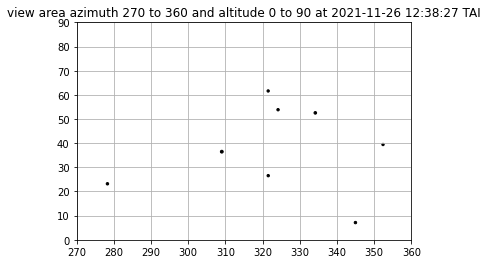

In [34]:
# preparing star object
from skyfield.api import Star
stars_ = Star.from_dataframe(stars)

# current time
ts = load.timescale()
t = ts.now()

# setting view point
bengaluru = earth + Topos("12.9716 N", "77.5946 E")
astrometric = bengaluru.at(t).observe(stars_)

# generating azimuths and altitude
altitude, azimuth, distance = astrometric.apparent().altaz()

from matplotlib import pyplot as plt

fig, ax = plt.subplots()
ax.scatter(azimuth.degrees, altitude.degrees, 8 - stars['magnitude'], 'k')
ax.set_xlim(az_s, az_e)
ax.set_ylim(alt_s, alt_e)
ax.grid(True)
ax.set(title=f"view area azimuth {az_s} to {az_e} and altitude {alt_s} to {alt_e} at {t.tai_strftime()}")
# fig.savefig('bright_stars.png')